In [99]:
# !pip install -r requirements.txt

In [100]:
#importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import  GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
%matplotlib inline

In [101]:
#Exibir totas as colunas no pandas
pd.set_option('display.max_columns', None)

In [102]:
df_base = pd.read_excel('data/trusted/base_final.xlsx').sort_values('fixture.id')
df_base.head()

,fixture.id,fixture.date,league.round,teams.home.id,teams.home.name,teams.home.winner,teams.away.id,teams.away.name,teams.away.winner,score.fulltime.home,score.fulltime.away,home_Ball Possession,home_Blocked Shots,home_Corner Kicks,home_Goalkeeper Saves,home_Passes %,home_Red Cards,home_Shots insidebox,home_Shots outsidebox,home_Shots off Goal,home_Shots on Goal,home_expected_goals,away_Ball Possession,away_Blocked Shots,away_Corner Kicks,away_Goalkeeper Saves,away_Passes %,away_Red Cards,away_Shots insidebox,away_Shots outsidebox,away_Shots off Goal,away_Shots on Goal,away_expected_goals,resultado,resultado_time
0,1005649,2023-04-16,1,127,Flamengo,True,147,Coritiba,False,3,0,0.59,3,6,3,0.89,0,5,10,5,7,1.37,0.41,5,3,4,0.85,0,3,7,2,3,0.36,1,Flamengo
1,1005650,2023-04-15,1,120,Botafogo,True,126,Sao Paulo,False,2,1,0.32,4,3,7,0.78,0,6,6,5,3,0.84,0.68,2,7,1,0.89,0,11,5,6,8,1.86,1,Botafogo
2,1005651,2023-04-15,1,121,Palmeiras,True,1193,Cuiaba,False,2,1,0.52,5,4,3,0.84,0,10,7,7,5,2.69,0.48,2,4,3,0.79,1,6,6,6,4,0.67,1,Palmeiras
3,1005652,2023-04-16,1,131,Corinthians,True,135,Cruzeiro,False,2,1,0.42,1,7,1,0.78,0,6,6,4,7,1.54,0.58,3,4,5,0.85,0,4,4,3,2,0.49,1,Corinthians
4,1005653,2023-04-15,1,794,RB Bragantino,True,118,Bahia,False,2,1,0.56,2,4,2,0.78,0,6,7,4,7,2.11,0.44,1,7,5,0.72,0,5,4,5,3,0.65,1,RB Bragantino


In [117]:
matches = len(df_base)
columns = len(df_base.columns)

home_win = len(df_base[df_base['resultado'] == 1])
away_win = len(df_base[df_base['resultado'] == 2])
draw_win = len(df_base[df_base['resultado'] == 0])

print('Qtd partidas:', matches)
print('Qtd colunas:', columns)
print('Vitoria Mandante:', home_win)
print('Vitoria Visitante:', away_win)
print('Empate:', draw_win)
print('Percentual Casa:', round(float(home_win/matches) *100,2) )
print('Percentual Visitante:', round(float(away_win/matches) *100,2) )
print('Percentual Empate:', round(float(draw_win/matches) *100,2) )

Qtd partidas: 380
Qtd colunas: 35
Vitoria Mandante: 178
Vitoria Visitante: 104
Empate: 98
Percentual Casa: 46.84
Percentual Visitante: 27.37
Percentual Empate: 25.79


Tratando colunas de Features

SC = Score Fulltime  
BP = Ball Possesion  
BS = Blocked Shots  
CK = Corner Kicks  
GS = Goalkeeper Saves  
P = Passes %  
RC = Red Cards  
SHI = Shots insidebox  
SHO = Shots outsidebox  
SHFG = Shots off Goal  
SHOG = Shots on Goal  
EG = Expected_goals

In [104]:
data = df_base.copy()

data['BP'] = data['home_Ball Possession'] - data['away_Ball Possession']
data['BS'] = data['home_Blocked Shots'] - data['away_Blocked Shots']
data['CK'] = data['home_Corner Kicks'] - data['away_Corner Kicks']
data['GS'] = data['home_Goalkeeper Saves'] - data['away_Goalkeeper Saves']
data['P'] = data['home_Passes %'] - data['away_Passes %']
data['RC'] = data['home_Red Cards'] - data['away_Red Cards']
data['SHI'] = data['home_Shots insidebox'] - data['away_Shots insidebox']
data['SHO'] = data['home_Shots outsidebox'] - data['away_Shots outsidebox']
data['SHFG'] = data['home_Shots off Goal'] - data['away_Shots off Goal']
data['SHOG'] = data['home_Shots on Goal'] - data['away_Shots on Goal']
data['EG'] = data['home_expected_goals'] - data['away_expected_goals']


data = data[['fixture.id', 'league.round', 'teams.home.id', 'teams.away.id',
             'BP', 'CK', 'GS', 'P', 'RC', 'SHI', 'SHO',
             'SHFG', 'SHOG', 'EG', 'resultado']]

data.head()

,fixture.id,league.round,teams.home.id,teams.away.id,BP,CK,GS,P,RC,SHI,SHO,SHFG,SHOG,EG,resultado
0,1005649,1,127,147,0.18,3,-1,0.04,0,2,3,3,4,1.01,1
1,1005650,1,120,126,-0.36,-4,6,-0.11,0,-5,1,-1,-5,-1.02,1
2,1005651,1,121,1193,0.04,0,0,0.05,-1,4,1,1,1,2.02,1
3,1005652,1,131,135,-0.16,3,-4,-0.07,0,2,2,1,5,1.05,1
4,1005653,1,794,118,0.12,-3,-3,0.06,0,1,3,-1,4,1.46,1


Preparando dados

In [105]:
#features treinamento
features = data[['teams.home.id', 'teams.away.id',
                 'BP', 'CK', 'GS', 'P', 'RC',
                 'SHI', 'SHO', 'SHFG', 'SHOG', 'EG']]


#labels treinamento
labels = data['resultado']

print('Features')
print (features.head())

print ('=========')

print ('Labels')
print (labels.head())

Features
   teams.home.id  teams.away.id    BP  CK  GS     P  RC  SHI  SHO  SHFG  SHOG  \
0            127            147  0.18   3  -1  0.04   0    2    3     3     4   
1            120            126 -0.36  -4   6 -0.11   0   -5    1    -1    -5   
2            121           1193  0.04   0   0  0.05  -1    4    1     1     1   
3            131            135 -0.16   3  -4 -0.07   0    2    2     1     5   
4            794            118  0.12  -3  -3  0.06   0    1    3    -1     4   

     EG  
0  1.01  
1 -1.02  
2  2.02  
3  1.05  
4  1.46  
Labels
0    1
1    1
2    1
3    1
4    1
Name: resultado, dtype: int64


In [106]:
# Normalizando os dados de entrada(features)

# Gerando o novo padrão
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

print ('Features: ',features_scale.shape)
print (features_scale)

Features:  (380, 12)
[[0.00837209 0.02697674 0.62962963 ... 0.53571429 0.54166667 0.54820937]
 [0.00186047 0.00744186 0.12962963 ... 0.39285714 0.16666667 0.26859504]
 [0.0027907  1.         0.5        ... 0.46428571 0.41666667 0.68732782]
 ...
 [0.02697674 0.01209302 0.38888889 ... 0.39285714 0.33333333 0.40220386]
 [0.         0.87813953 0.22222222 ... 0.67857143 0.41666667 0.48209366]
 [1.         0.01488372 0.35185185 ... 0.39285714 0.5        0.6184573 ]]


In [107]:
row_end_train = len(data[data['league.round'] <= 28])
print(row_end_train)

280


In [108]:
#Separa em treinamento e teste

X_train = features_scale[:row_end_train]
X_test = features_scale[row_end_train:]
y_train = labels[:row_end_train]
y_test = labels[row_end_train:]

print( len(X_train), len(y_train))

print( len(X_test), len(y_test))

280 280
100 100


In [109]:
#Treinando e testando os modelos
model_LR = LogisticRegression(multi_class='multinomial', max_iter=2000)
model_LR.fit(X_train, y_train)
pred = model_LR.predict(X_test)

lg_acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred,average = 'micro')

print ('Acurácia Regressão Logistica:', lg_acc)
print ('F1 Score:', f1)

Acurácia Regressão Logistica: 0.6
F1 Score: 0.6


In [110]:
#Executando a previsao

id_partida = data[row_end_train:]['fixture.id']
resultado_real = data[row_end_train:]['resultado']

previsao = features_scale[row_end_train:]
pred = model_LR.predict(previsao)

df_resultados = pd.DataFrame({'real': resultado_real, 'previsao':pred, 'fixture.id':id_partida})

print(df_resultados)

     real  previsao  fixture.id
280     1         1     1005929
281     2         2     1005930
282     1         1     1005931
283     1         1     1005932
284     2         2     1005933
..    ...       ...         ...
375     0         1     1006024
376     1         1     1006025
377     2         1     1006026
378     1         1     1006027
379     1         1     1006028

[100 rows x 3 columns]


In [111]:
df_base_predct = df_base.merge(df_resultados, how='left', on=['fixture.id']).drop(columns='real')

df_base_predct['previsao_time'] = \
    np.where( df_base_predct['previsao'] == 1, df_base_predct['teams.home.name'],
    np.where( df_base_predct['previsao'] == 2, df_base_predct['teams.away.name'],
    np.where( df_base_predct['previsao'] == 0, 'Empate',
    None)))

In [112]:
df_base_predct.to_excel('data/trusted/base_predita.xlsx', index=False)

In [113]:
df=pd.DataFrame(df,columns=['real','previsao' ])

<Axes: xlabel='previsao', ylabel='real'>

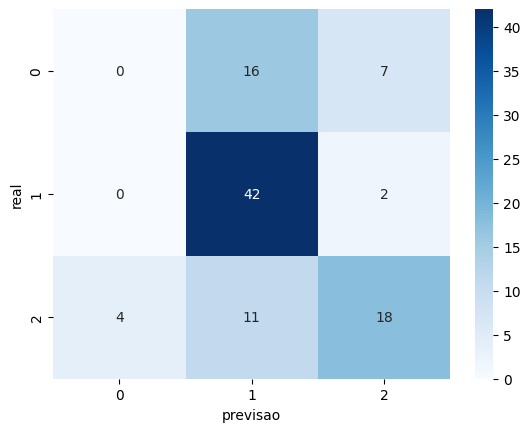

In [114]:
#confusion Matrix
cf_matrix=pd.crosstab(df_resultados['real'], df_resultados['previsao'],
                      rownames=['real'] , colnames=['previsao'])
sns.heatmap(cf_matrix, annot=True, cmap='Blues')